![RedWine](./images/redwine.gif)

# Import 

In [73]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib as plt
import plotly.express as px
import seaborn as sb
import plotly.graph_objects as go
from scipy.stats import norm
import matplotlib.pyplot as plt
import plotly.figure_factory as ff


# Reading wines data 🍷 

In [74]:
data = pd.read_csv("resources/Wines.csv")

data = data.drop(columns='Id')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1144 non-null   float64
 1   volatile acidity      1144 non-null   float64
 2   citric acid           1144 non-null   float64
 3   residual sugar        1144 non-null   float64
 4   chlorides             1144 non-null   float64
 5   free sulfur dioxide   1144 non-null   float64
 6   total sulfur dioxide  1144 non-null   float64
 7   density               1144 non-null   float64
 8   pH                    1144 non-null   float64
 9   sulphates             1144 non-null   float64
 10  alcohol               1144 non-null   float64
 11  quality               1144 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.4 KB


# Exploratory Analysis 🕵️‍♂️

In [76]:
data.head().style.background_gradient(cmap='Wistia').format('{:.2f}')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5.00
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5.00
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5.00
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6.00
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5.00


In [77]:
print('Data shape :',data.shape)

Data shape : (1144, 12)


## Missing Values ?

In [78]:
print(data.isnull().any())
#False -> no missing values in the column
#True -> yes there is at least one missing value

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


## Duplicated data ?

In [79]:
print('Number of duplicated data :',data.duplicated().sum())

Number of duplicated data : 125


In [80]:
#Delete duplicated data (keep the first row)
bool_dup = data.duplicated(keep='first')
data = data[~bool_dup]
print("Data shape after eleting duplicated values :",data.shape)

Data shape after eleting duplicated values : (1019, 12)


## Basic Stats

In [81]:
data.describe(exclude = 'object').T.style.bar(subset=['mean'], color='#0CA407').background_gradient(subset=['std'], cmap='OrRd').format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1019.00,8.29,1.74,4.60,7.10,7.90,9.10,15.90
volatile acidity,1019.00,0.53,0.18,0.12,0.39,0.52,0.65,1.58
citric acid,1019.00,0.27,0.20,0.00,0.09,0.25,0.42,1.00
residual sugar,1019.00,2.52,1.31,0.90,1.90,2.20,2.60,15.50
chlorides,1019.00,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,1019.00,15.64,10.17,1.00,7.00,13.00,21.00,68.00
total sulfur dioxide,1019.00,46.31,33.11,6.00,21.00,38.00,62.00,289.00
density,1019.00,1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,1019.00,3.31,0.16,2.74,3.21,3.31,3.40,4.01
sulphates,1019.00,0.66,0.17,0.33,0.55,0.62,0.72,2.00


## Graph analysis 🎯

In [82]:
#Allow to create bettter looking boxplot
def boxplot_data(df,var):
    q3=df[var][df['quality']==3]
    q4=df[var][df['quality']==4]
    q5=df[var][df['quality']==5]
    q6=df[var][df['quality']==6]
    q7=df[var][df['quality']==7]
    q8=df[var][df['quality']==8]
    trace0 = go.Box(y=q3,name='3')
    trace1 = go.Box(y=q4,name='4')
    trace2 = go.Box(y=q5,name='5')
    trace3 = go.Box(y=q6,name='6')
    trace4 = go.Box(y=q7,name='7')
    trace5 = go.Box(y=q8,name='8')
    data=[trace0,trace1,trace2,trace3,trace4,trace5]
    return data

### Quality

#### Repartition

In [83]:
fig = px.pie(data.groupby(["quality"]).count().reset_index(), 
            names="quality", 
            values="alcohol",
            title="Quality % repartition")
fig.show()

In [84]:
fig = px.bar(
            data.groupby(["quality"]).count().reset_index(), 
            x='quality', 
            y='volatile acidity',
            title="Quality count", 
            labels={
                "volatile acidity": "Count",
                "quality": "Quality"
            }
)

fig.show()

#### vs Fixed acidity

In [85]:
fig=go.Figure(data=boxplot_data(data,'fixed acidity'))
fig.update_layout(title="Fixed acidity against quality",
                    xaxis_title="Quality",
                    yaxis_title="Fixed acidity",
                    legend_title="Quality",
                    font=dict(size=14))
fig.show()

#### vs Volatile acidity ( ↘️ )

In [86]:
fig=go.Figure(data=boxplot_data(data,'volatile acidity'))
fig.update_layout(title="Volatile acidity against quality",
                    xaxis_title="Quality",
                    yaxis_title="Volatile acidity",
                    legend_title="Quality",
                    font=dict(size=14))
fig.show()

#### vs Citric acid

In [87]:
fig=go.Figure(data=boxplot_data(data,'citric acid'))
fig.update_layout(title="Citric acid against quality",
                    xaxis_title="Quality",
                    yaxis_title="Citric acid",
                    legend_title="Quality",
                    font=dict(size=14))
fig.show()

#### vs Residual sugar

In [88]:
fig=go.Figure(data=boxplot_data(data,'residual sugar'))
fig.update_layout(title="Residual sugar against quality",
                    xaxis_title="Quality",
                    yaxis_title="Residual sugar",
                    legend_title="Quality",
                    font=dict(size=14))
fig.show()

#### vs Chlorides

In [89]:
fig=go.Figure(data=boxplot_data(data,'chlorides'))
fig.update_layout(title="Chlorides against quality",
                    xaxis_title="Quality",
                    yaxis_title="Chlorides",
                    legend_title="Quality",
                    font=dict(size=14))
fig.show()

#### vs Sulphates ( ↗️ )

In [90]:
fig=go.Figure(data=boxplot_data(data,'sulphates'))
fig.update_layout(title="Sulphates against quality",
                    xaxis_title="Quality",
                    yaxis_title="Sulphates",
                    legend_title="Quality",
                    font=dict(size=14))
fig.show()

#### vs Alcohol ( ↗️ )

In [91]:
fig=go.Figure(data=boxplot_data(data,'alcohol'))
fig.update_layout(title="Alcohol against quality",
                    xaxis_title="Quality",
                    yaxis_title="Alcohol",
                    legend_title="Quality",
                    font=dict(size=14))
fig.show()

## Pairplot

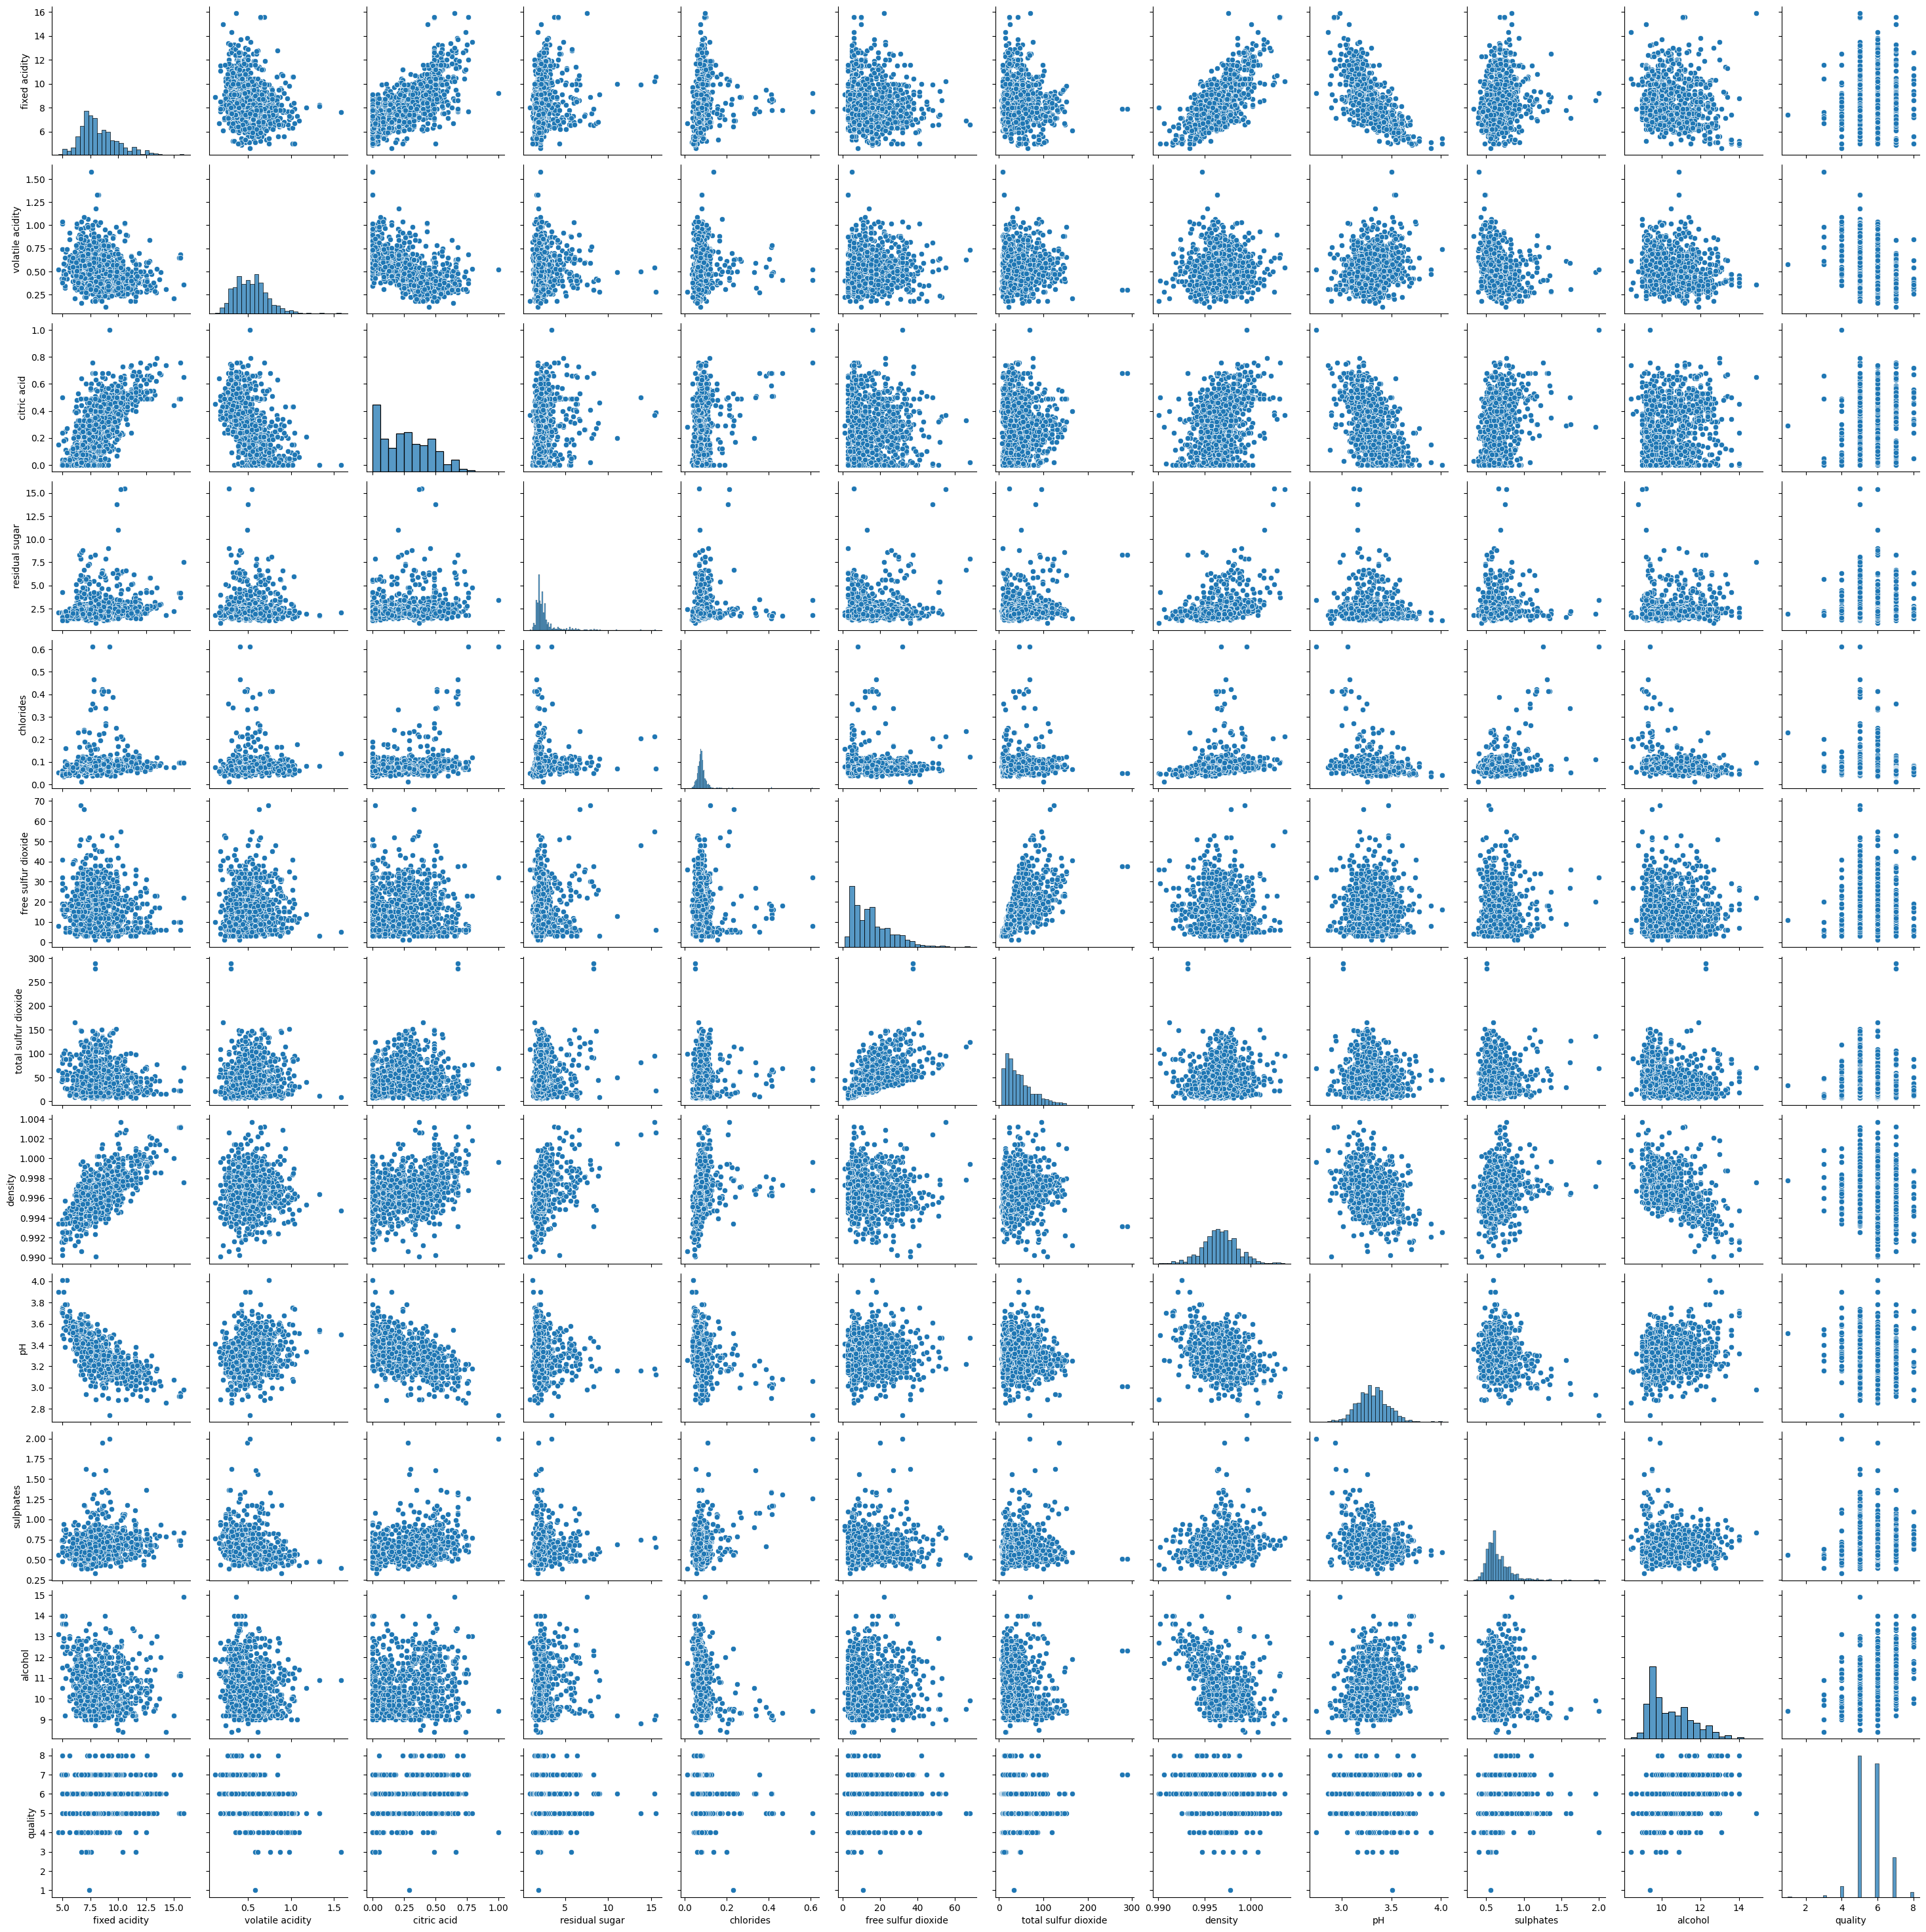

In [92]:
sb.pairplot(data)


## Heatmap

In [ ]:
fig = px.imshow(data.corr(), color_continuous_scale= px.colors.diverging.OrRd)
fig.show()

: 

The quality is : 
- higly correlated to the alcohol (0.485) ↗️
                 
- higly correlated to the volatile acidity (-0.409) ↘️

However, sulphates is only correlated to 0.25. So it's not that significant 

Because some quality doesn't have a high frequency, we want to group the wines by their qualities :
- quality <= 5 ➜ bad wine
- quality >= 6 ➜ good wine

💡 Maybe we could use the alcohol rate or the volatile acidity rate to create a new quality ranking 💡

## Normal distribution 〰️

### Alcohol rate grouped by quality

In [94]:
tmp = [data['alcohol'],data['alcohol'].loc[data['quality']<=5],data['alcohol'].loc[data['quality']>5]]

fig = ff.create_distplot(tmp, ['All','Quality <= 5','Quality >= 6'],
                        curve_type='normal',
                        bin_size=0.1)
fig.update_layout(title_text='Normal distribution of alcohol rate')
fig.show()

### Volatile acidity grouped by quality

In [95]:
tmp = [data['volatile acidity'],data['volatile acidity'].loc[data['quality']<=5],data['volatile acidity'].loc[data['quality']>5]]

fig = ff.create_distplot(tmp, ['All','Quality <= 5','Quality >= 6'],
                        curve_type='normal',
                        bin_size=0.05)
fig.update_layout(title_text='Normal distribution of volatile acidity')
fig.show()

## Scatter plot grouped by the quality

<AxesSubplot: xlabel='alcohol', ylabel='volatile acidity'>

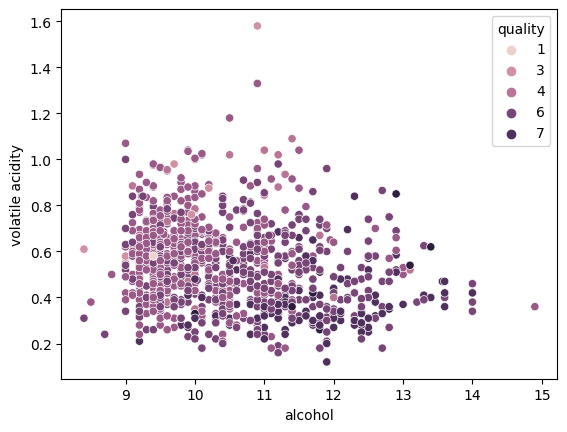

In [96]:
sb.scatterplot(data=data, x="alcohol", y="volatile acidity", hue="quality")

# Conclusion 

![Bye](./images/bye.gif)